In [1]:
using JSON
using Random
using Distributions
include("/home/peters/code/mapinator/estimation/functions.jl")
YEAR_INTERVAL = 2003:2023  # change this to select the years of data to include in the estimation
#NUM = 5 variable in this code
sinks = ["Other Academic","Government","Private Sector","Teaching Universities","Postdoc", "Sessionals","Column Totals"]
NUMSINKS = length(sinks) - 1
academic_builder, sink_builder, academic, acd_sink, gov_sink, pri_sink, tch_sink, postdoc, lecturer = functions.process_data(YEAR_INTERVAL);
institutions, out = functions.create_adjacency_matrix(academic_builder, sink_builder, academic,acd_sink, gov_sink, pri_sink, tch_sink, postdoc, lecturer);

Debug: 14875 returned from api
Debug: 7272 academic placements
Debug: 7603 sinks
Debug: 14875 in all


In [2]:
sample_size = length(academic_builder) + length(sink_builder)

14875

In [3]:


LH = Dict{}()
Threads.@threads for i in 2:10
    println("i = $i on thread $(Threads.threadid())")
    est_obj, est_alloc = functions.doit(out, collect(academic),collect(acd_sink), collect(gov_sink), collect(pri_sink), collect(tch_sink), collect(postdoc), collect(lecturer) , institutions, i, NUMSINKS);
    println(i, " types; ", est_obj)
    push!(LH, i => est_obj)
    
end


i = 8 on thread 7
i = 2 on thread 1
i = 4 on thread 3
i = 10 on thread 9
i = 3 on thread 2
i = 9 on thread 8
i = 6 on thread 5
i = 5 on thread 4
i = 7 on thread 6
2 types; 56482.992445154734
3 types; 52330.27148116431
8 types; 48725.253218197475
6 types; 49298.30922342552
5 types; 49804.016324337776
4 types; 50677.0737474302
7 types; 48956.98942199246
9 types; 48477.00705286313
10 types; 47900.99968360404


In [4]:
LH

Dict{Any, Any} with 9 entries:
  5  => 49804.0
  4  => 50677.1
  6  => 49298.3
  7  => 48957.0
  2  => 56483.0
  10 => 47901.0
  9  => 48477.0
  8  => 48725.3
  3  => 52330.3

saved
2 types; 56491.640561501765
3 types; 52338.72003688777
4 types; 50684.975789483025
5 types; 49804.69115761471
6 types; 49580.94998473299
7 types; 48933.05508607621
8 types; 48698.57691055575
9 types; 48513.73025383677
10 types; 47973.35309477646

In [5]:
#=
LL = Dict(
2 => 26225.405225627135,
3 => 24417.826257099012,
4 => 23380.644305498685,
5 => 22984.784801164944,
6 => 22783.686607872536,
7 => 22570.826001396676,
8 => 22450.381263862102,
9 => 22275.202619123305,
10 => 22116.01175131814)
=#


In [6]:

function entropy(tuning,LL,sample_size)
    #B = Array{}
    B = []
    for i=2:10
        push!(B,LL[i]+tuning*(i)*(i+1)*sample_size*log(sample_size)/2)
    end
    S = sum(B)
    #A = Array{}
    A= []
    for x in B
        push!(A, x/S)
    end
    E = 0
    for y in A
        E += -y*log(y)
    end
    return E
end


weight = .001
for i = 2:10
    println("tier ",i," ",LH[i]," ",weight*(i)*(i+1)*sample_size*log(sample_size)/2," ",LH[i]+weight*(i)*(i+1)*sample_size*log(sample_size)/2)
end


tier 2 56482.992445154734 428.7318864072172 56911.72433156195
tier 3 52330.27148116431 857.4637728144344 53187.735253978746
tier 4 50677.0737474302 1429.1062880240574 52106.18003545426
tier 5 49804.016324337776 2143.659432036086 51947.675756373865
tier 6 49298.30922342552 3001.1232048505203 52299.432428276035
tier 7 48956.98942199246 4001.4976064673606 52958.48702845982
tier 8 48725.253218197475 5144.782636886608 53870.03585508408
tier 9 48477.00705286313 6430.978296108259 54907.98534897139
tier 10 47900.99968360404 7860.084584132315 55761.084267736354


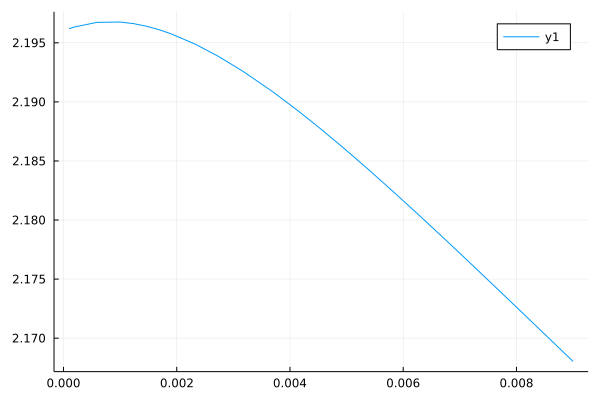

In [7]:
entropy(weight,LH,sample_size)
using Plots
plot(x->entropy(x,LH,sample_size),.0001,.009)
#=
sample_size = 8266
for i = 2:10
    println(i," tiers: ",LL[i]+.001*(i)*(i+1)*sample_size*log(sample_size)/2)
end
=#